**HealthInsight AI** is a powerful machine learning model designed to predict health outcomes with high accuracy. Utilizing advanced algorithms like XGBoost and LightGBM, it provides precise disease classification. With hyperparameter tuning and model interpretation tools like SHAP, it offers reliable insights, aiding healthcare professionals in decision-making.

**Load the Dataset**

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Basic Information and Insights**

In [33]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Get basic information about the dataset
df.info()


Dataset Shape: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  p

# **Exploratory Data Analysis (EDA)**

**Class Distribution**

<ipython-input-34-5360935fa1d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


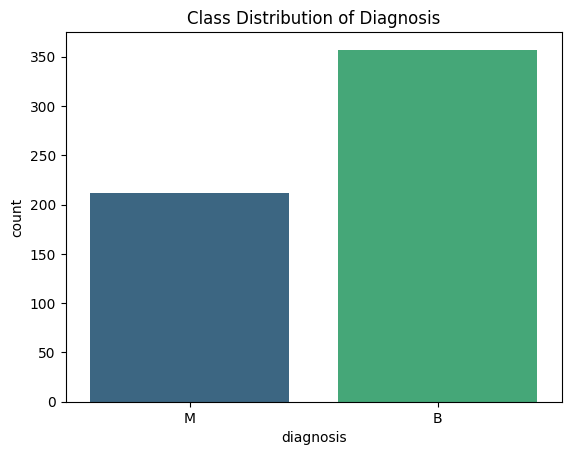

diagnosis
B    357
M    212
Name: count, dtype: int64


In [34]:
# Check the distribution of the target variable (diagnosis)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Class Distribution of Diagnosis')
plt.show()

# Display the count of each class
print(df['diagnosis'].value_counts())


**Correlation Heatmap**

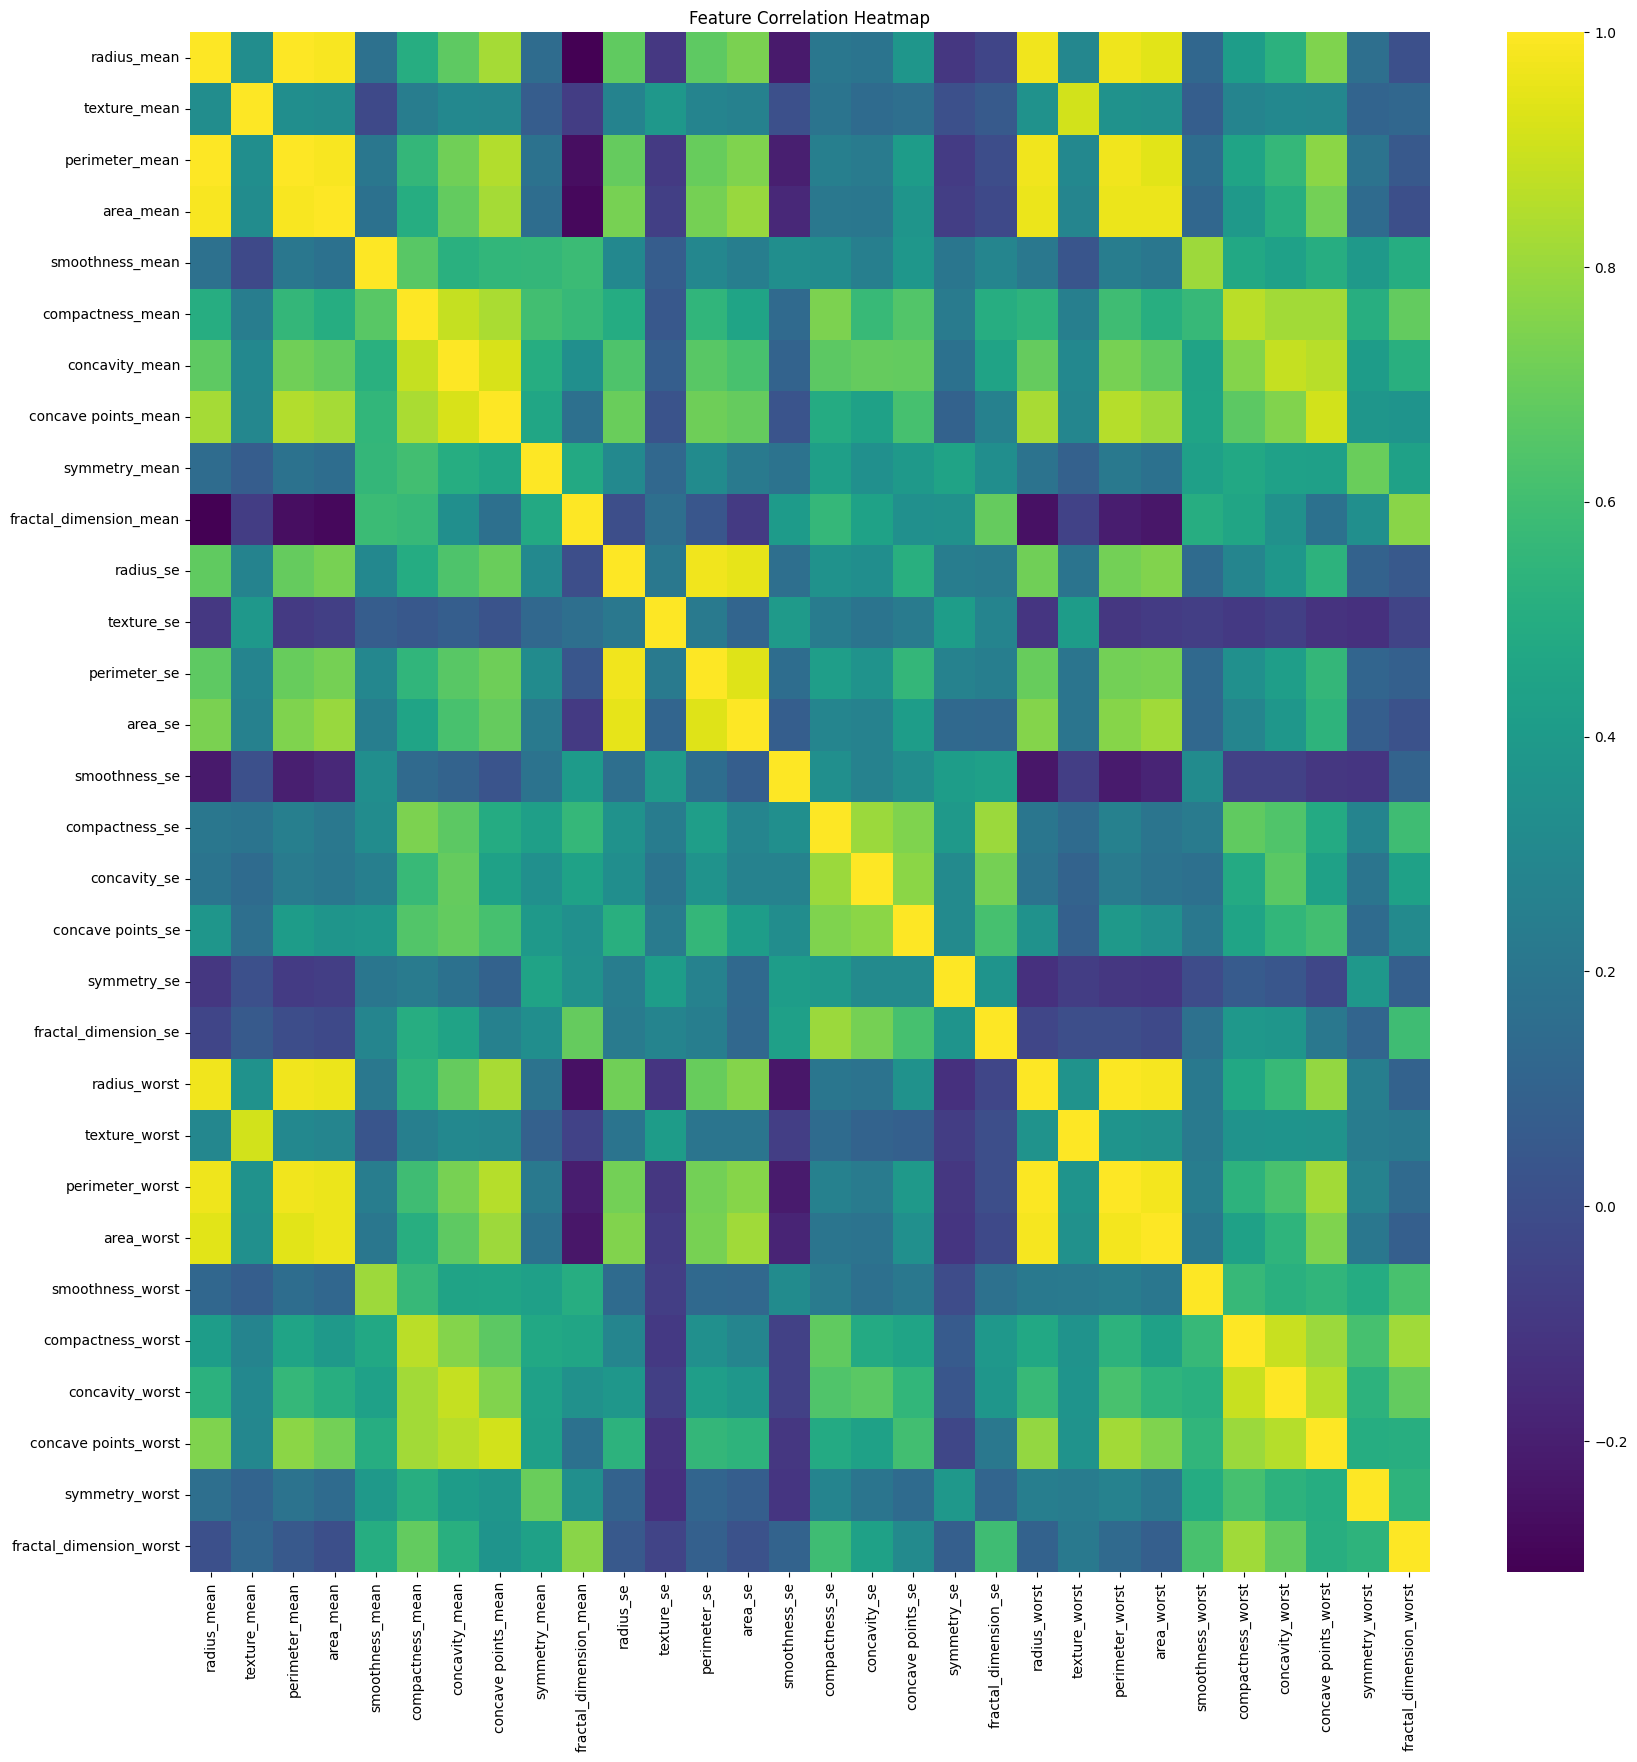

In [35]:
# Drop non-numeric columns for correlation analysis
numeric_df = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])

# Calculate correlations
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()


**Pair Plots**

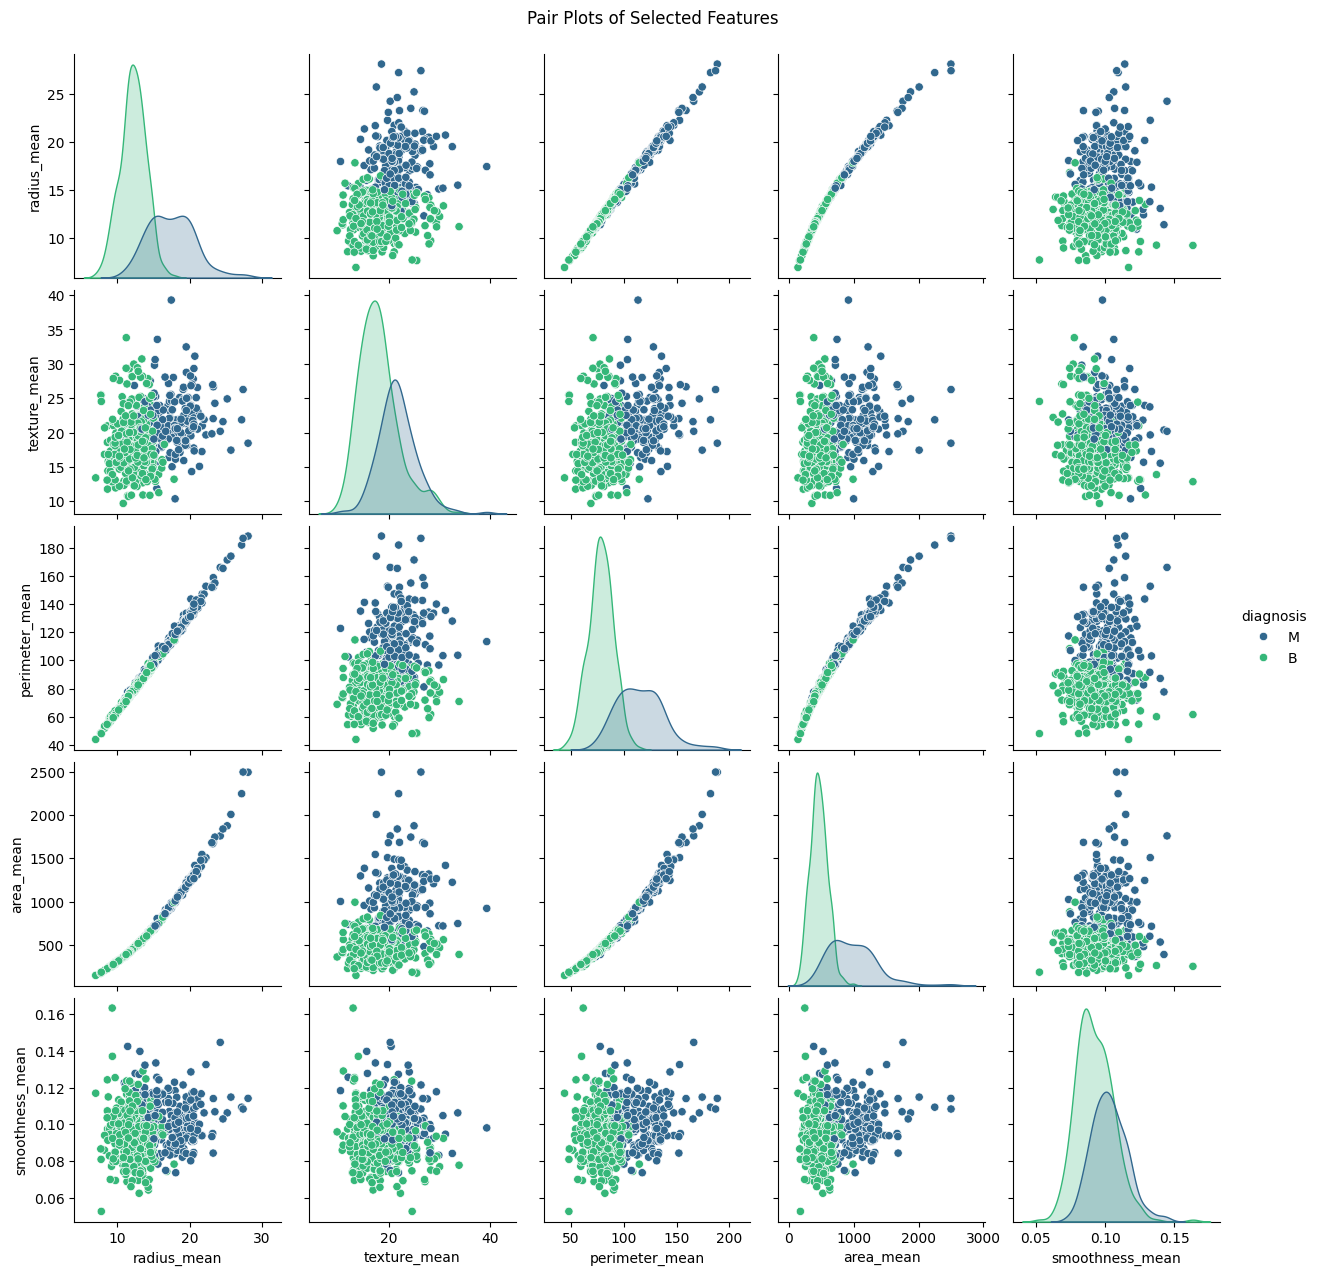

In [36]:
# Select a subset of features for pair plots
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']

# Create pair plots
sns.pairplot(df[selected_features], hue='diagnosis', palette='viridis')
plt.suptitle('Pair Plots of Selected Features', y=1.02)
plt.show()


**Box Plots for Outlier Detection**

<ipython-input-37-d31434f78cdf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-37-d31434f78cdf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-37-d31434f78cdf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-37-d31434f78cdf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

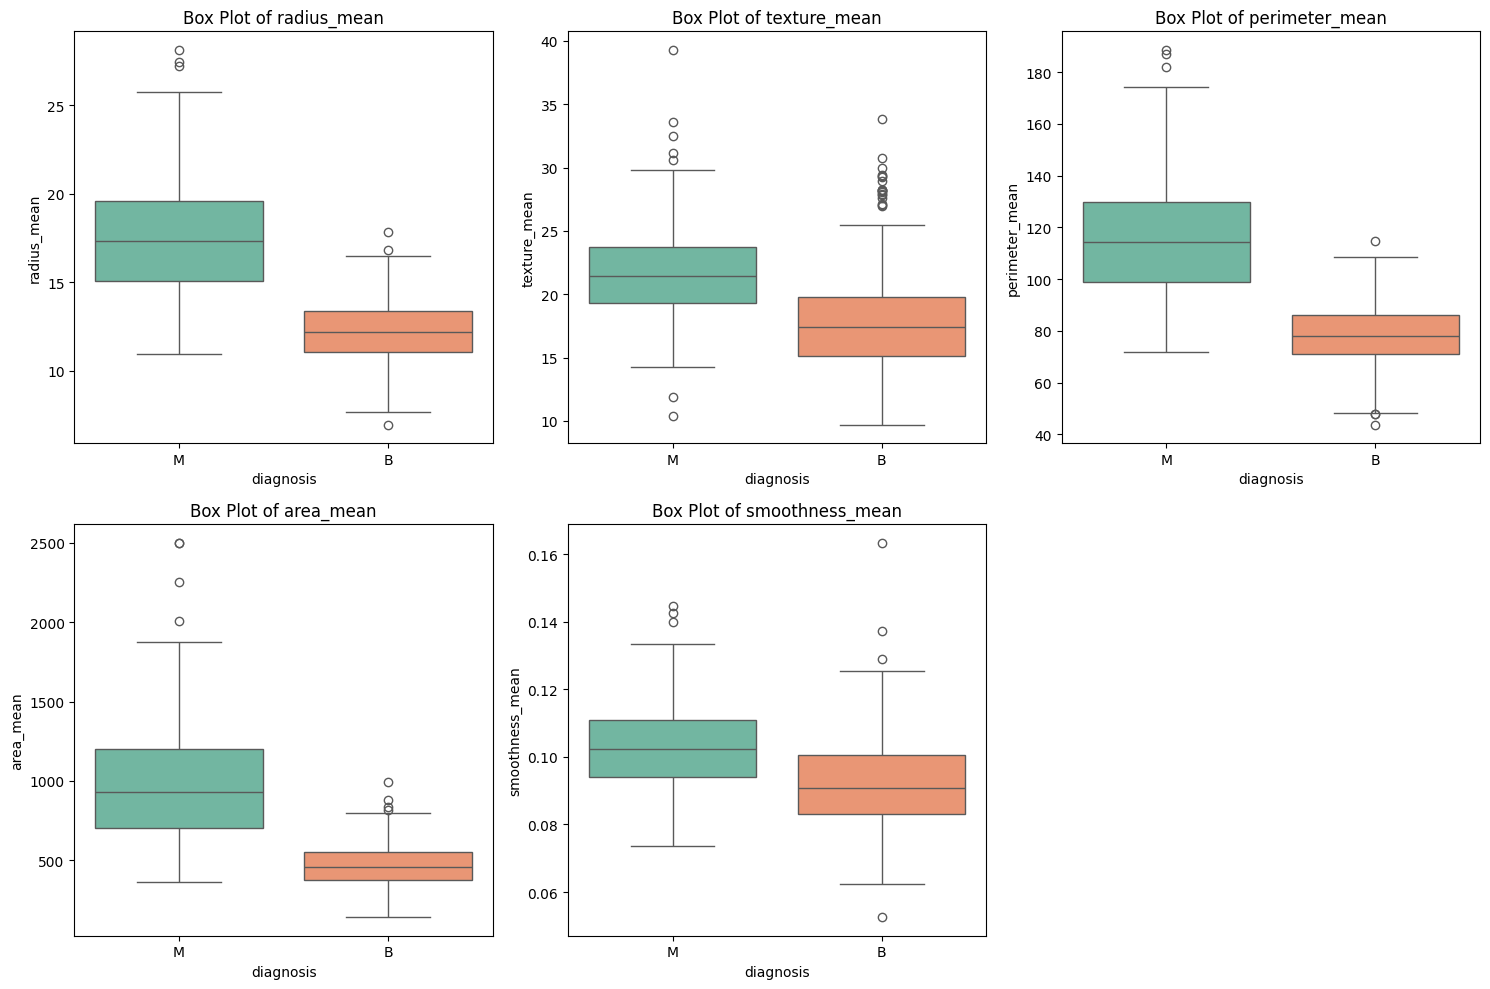

In [37]:
# List of features to plot
boxplot_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Create box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(boxplot_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()

plt.show()


# **Data Preprocessing**

**Handling Missing Values**

In [38]:
# Drop the column with all null values
df.drop(columns=['Unnamed: 32'], inplace=True)

# Verify the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Feature Scaling**

In [39]:
from sklearn.preprocessing import StandardScaler

# Drop 'id' since it's not a feature, and separate features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the scaled data
X_scaled.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**Feature Selection**

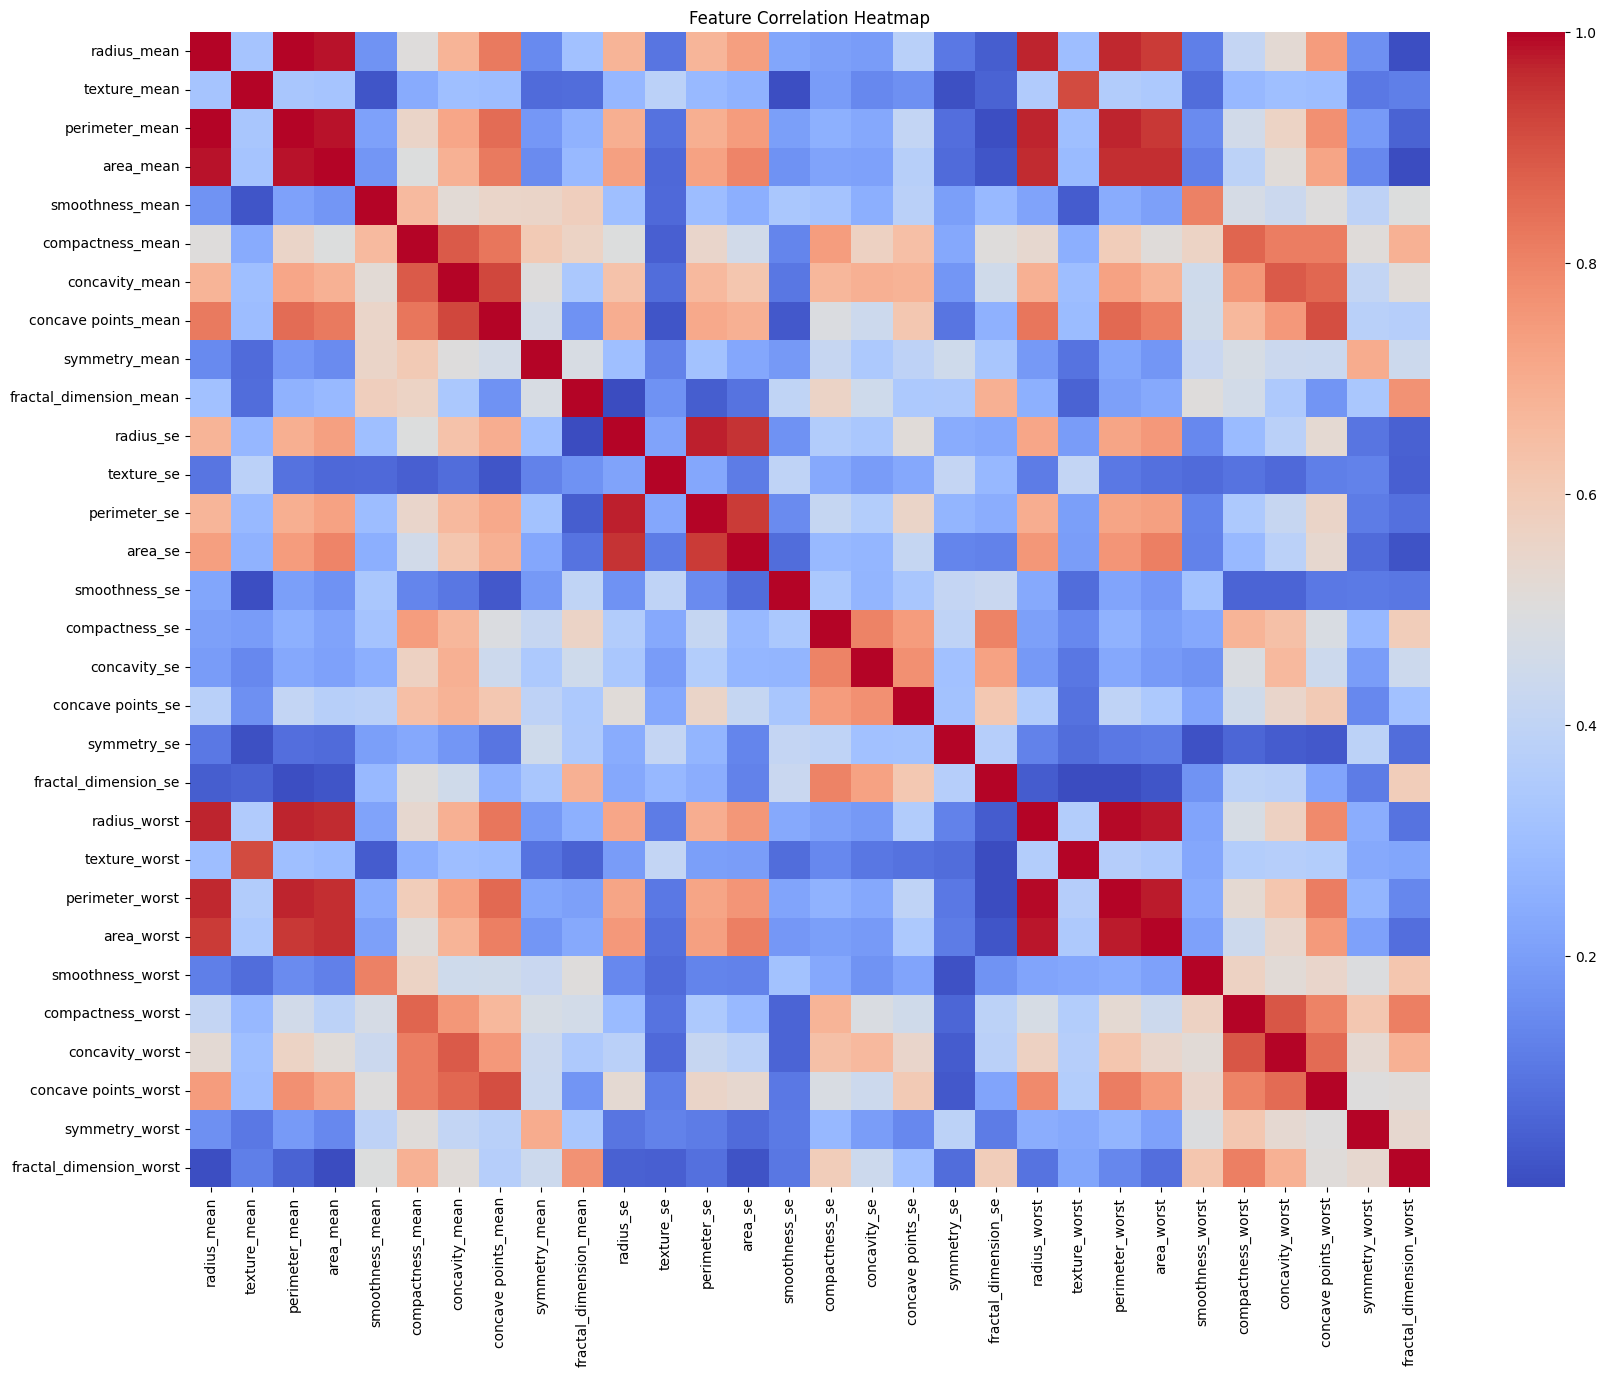

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_scaled.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


**Drop Highly Correlated Features**

In [41]:
# Display correlation matrix values
import numpy as np

# Get the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Display highly correlated feature pairs
high_corr_pairs = [(col, row, upper_triangle.loc[row, col])
                   for col in upper_triangle.columns
                   for row in upper_triangle.index
                   if abs(upper_triangle.loc[row, col]) > 0.75]

high_corr_pairs  # List of highly correlated feature pairs


[('perimeter_mean', 'radius_mean', 0.9978552814938094),
 ('area_mean', 'radius_mean', 0.9873571700566122),
 ('area_mean', 'perimeter_mean', 0.9865068039913902),
 ('concavity_mean', 'compactness_mean', 0.8831206701772505),
 ('concave points_mean', 'radius_mean', 0.8225285223871796),
 ('concave points_mean', 'perimeter_mean', 0.8509770412528191),
 ('concave points_mean', 'area_mean', 0.8232688686524328),
 ('concave points_mean', 'compactness_mean', 0.8311350431336991),
 ('concave points_mean', 'concavity_mean', 0.9213910263788581),
 ('perimeter_se', 'radius_se', 0.9727936770160753),
 ('area_se', 'area_mean', 0.800085921234322),
 ('area_se', 'radius_se', 0.9518301121109907),
 ('area_se', 'perimeter_se', 0.9376554069544162),
 ('concavity_se', 'compactness_se', 0.8012683427383291),
 ('concave points_se', 'concavity_se', 0.7718039949238455),
 ('fractal_dimension_se', 'compactness_se', 0.8032688176617679),
 ('radius_worst', 'radius_mean', 0.9695389726112066),
 ('radius_worst', 'perimeter_mean

In [14]:
# Set a lower correlation threshold
threshold = 0.80

# Recalculate columns to drop
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold) and column != corr_matrix.columns[corr_matrix[column].argmax()]]

# Drop these columns
X_selected = X_scaled.drop(columns=to_drop)
X_selected.shape  # Check the new shape of the feature set


(569, 30)

In [28]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
drop_features = [
    'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
    'compactness_mean', 'concavity_mean', 'concave points_mean',
    'radius_se', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se',
    'texture_worst', 'smoothness_worst',
    'fractal_dimension_worst'
]

X_selected = X_scaled.drop(columns=drop_features)
X_selected.shape


(569, 14)

In [43]:
# Naming the updated DataFrame
updated_df = X_selected

# Displaying column names of the updated DataFrame
print("Updated DataFrame Column Names:")
print(updated_df.columns)


Updated DataFrame Column Names:
Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concave points_se', 'symmetry_se',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


In [44]:
# Display original DataFrame column names
print("Original DataFrame Column Names:")
print(df.columns)

# Display updated DataFrame column names
print("\nUpdated DataFrame Column Names:")
print(updated_df.columns)


Original DataFrame Column Names:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Updated DataFrame Column Names:
Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concave points_se', 'symmetry_se',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmet

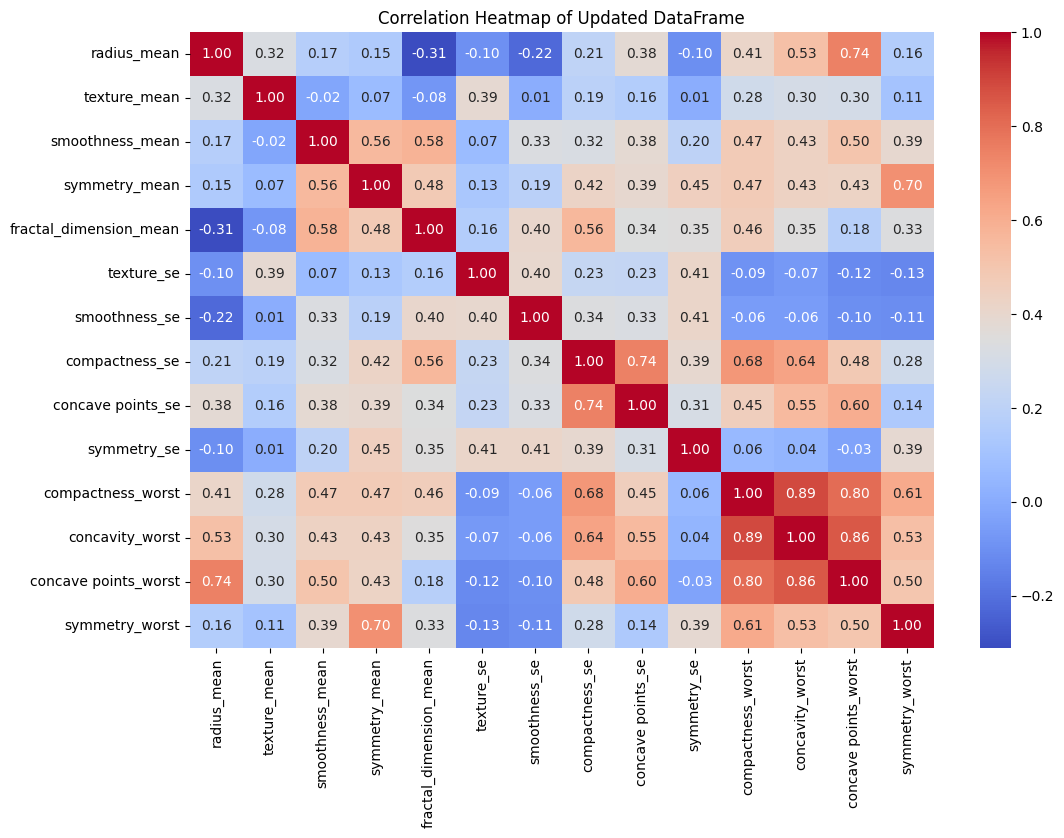

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = updated_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Updated DataFrame')
plt.show()


# **Model Selection**

**Import Necessary Libraries**

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


**Train Test Split**

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your updated DataFrame
# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])  # Drop target column
y # Target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the data
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)


Training Data Shape: (455, 31)
Testing Data Shape: (114, 31)


# **Model Selection and Training**

**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Perform cross-validation and calculate accuracy
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores and mean accuracy
print("Logistic Regression Cross-Validation Scores:", log_reg_scores)
print("Logistic Regression Mean Accuracy:", log_reg_scores.mean())


Logistic Regression Cross-Validation Scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Logistic Regression Mean Accuracy: 0.9736263736263737


**Decision Tree Classifier**

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform cross-validation and calculate accuracy
dt_scores = cross_val_score(decision_tree, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores and mean accuracy
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Decision Tree Mean Accuracy:", dt_scores.mean())


Decision Tree Cross-Validation Scores: [0.9010989  0.91208791 0.94505495 0.9010989  0.92307692]
Decision Tree Mean Accuracy: 0.9164835164835164


**Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform cross-validation and calculate accuracy
rf_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores and mean accuracy
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())


Random Forest Cross-Validation Scores: [0.96703297 0.94505495 0.97802198 0.94505495 0.93406593]
Random Forest Mean Accuracy: 0.9538461538461538


**Support Vector Machine (SVM)**

In [50]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Perform cross-validation and calculate accuracy
svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores and mean accuracy
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())


SVM Cross-Validation Scores: [0.96703297 0.96703297 0.98901099 0.96703297 0.94505495]
SVM Mean Accuracy: 0.9670329670329672


**k-Nearest Neighbors (KNN)**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=5 (default)
knn_model = KNeighborsClassifier()

# Perform cross-validation and calculate accuracy
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores and mean accuracy
print("KNN Cross-Validation Scores:", knn_scores)
print("KNN Mean Accuracy:", knn_scores.mean())


KNN Cross-Validation Scores: [0.96703297 0.95604396 0.98901099 0.97802198 0.92307692]
KNN Mean Accuracy: 0.9626373626373628


**Gradient Boosting (XGBoost)**

In [53]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Convert 'B' and 'M' to 0 and 1

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform cross-validation and calculate accuracy
xgb_scores = cross_val_score(xgb_model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')

# Output the cross-validation scores and mean accuracy
print("XGBoost Cross-Validation Scores:", xgb_scores)
print("XGBoost Mean Accuracy:", xgb_scores.mean())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Scores: [0.94505495 0.96703297 0.98901099 0.96703297 0.96703297]
XGBoost Mean Accuracy: 0.9670329670329669
